# Ajuste de curvas e mínimos quadrados

- Escreva um código que calcule o melhor polinômio interpolador de grau n, para vários valores de n, e faça diversos experimentos para várias funções diferentes.

- Faça o mesmo considerando ridge regression. Explore different 0 ≤ λ ≤ 1

- Faça um gráfico dos erros no conjunto de treino e em conjunto teste

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math

from scipy.optimize import minimize

# 1ª Parte - Polinômio Interpolador

## Códigos para gerar os pontos, o polinômio interpolador e os gráficos

In [ ]:
def generate_points(num_points, a , b, f):
    # Gera valores aleatórios para x no intervalo desejado
    x_values = np.linspace(a, b, num = num_points)

    # Calcula os valores correspondentes de f(x)
    y_values = f(x_values)

    for i, _ in enumerate(y_values):
      noise = np.random.normal(0, 0.05)
      y_values[i] += noise

    return x_values, y_values

In [ ]:
def poly(x, w):

  soma = 0
  for i, coef in enumerate(w):
    soma += x**(i)*coef

  return soma

Temos que minimizar o seguinte termo:

$$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2 $$

Podemos abrir em:<br>

$$    (X \beta - y)^{T} . (X \beta - y)  $$

$$ = $$

$$ (X \beta)^{T} X \beta - (X \beta)^{T} y - y^{T} X \beta + y^{T}y $$

<br>

Temos que $ y^{T} X \beta = (y^{T} X \beta)^{T} = (X \beta)^{T} y  $

<br>

Dessa forma temos: <br>

$$ (X \beta)^{T} X \beta - 2 y^{T} X \beta + y^{T}y  $$

<br>

Para acharmos o $ \beta $ que minimiza a equação acima, precisamos derivar termo a termo e igualar a zero.

$$ \frac{\partial ( (X \beta)^{T} X \beta ))}{\partial \beta} - \frac{\partial (2 y^{T} X \beta) }{\partial \beta} + \frac{\partial(y^{T}y)}{\partial \beta} $$

<br>

$$ 2 X^{T} X \beta - 2y^{T}X + 0 = 0 $$

<br>

$$   X^{T} X  \beta = y^{T} X $$

In [ ]:
def poly_inter(grau, x_values, y_values, num_points):

  X = np.random.random((num_points,grau+1)) # Matriz que iremos construir

  ### Matriz de Vandermonde
  for n_linha in range(num_points):
    linha = np.ones(grau+1)

    for i in range(grau+1): # criando a linha
      linha[i] = x_values[n_linha]**(i)

    X[n_linha] = linha

  I = np.identity(grau+1)
  w_estrela = np.linalg.solve( np.dot(X.T, X) , np.dot(y_values.T, X) )

  x_poly = np.linspace(x_values[0], x_values[-1], num = 100)
  y_poly = poly(x_poly, w_estrela)

  return x_poly, y_poly, w_estrela

In [ ]:
def gerar_graphs(num_points, a, b, f, M_list, linha_subplot, coluna_subplot, str_f):

  x_values, y_values = generate_points(num_points, a, b, f)
  eixo_x = np.linspace(a, b, num = 100)

  plt.figure(figsize=(16,7))
  for i, M in enumerate(M_list):
    x_poly, y_poly, _ = poly_inter(M, x_values, y_values, num_points)

    plt.subplot(linha_subplot,coluna_subplot, i+1)
    plt.scatter(x_values, y_values, label='Dados Gerados', color='blue')
    plt.plot(eixo_x, f(eixo_x), color = 'green', label = 'Função ' + str_f)
    plt.plot(x_poly, y_poly, label='Curva Ajustada', linestyle='--', color='red')
    plt.ylim(-2, 2)  # Limites para o eixo y
    plt.legend()
    plt.title('M = ' + str(M))
    plt.xlabel('x')
    plt.ylabel('y')

  plt.tight_layout()
  plt.show()

## Exemplos para a função $cos(x)$

### 5 pontos

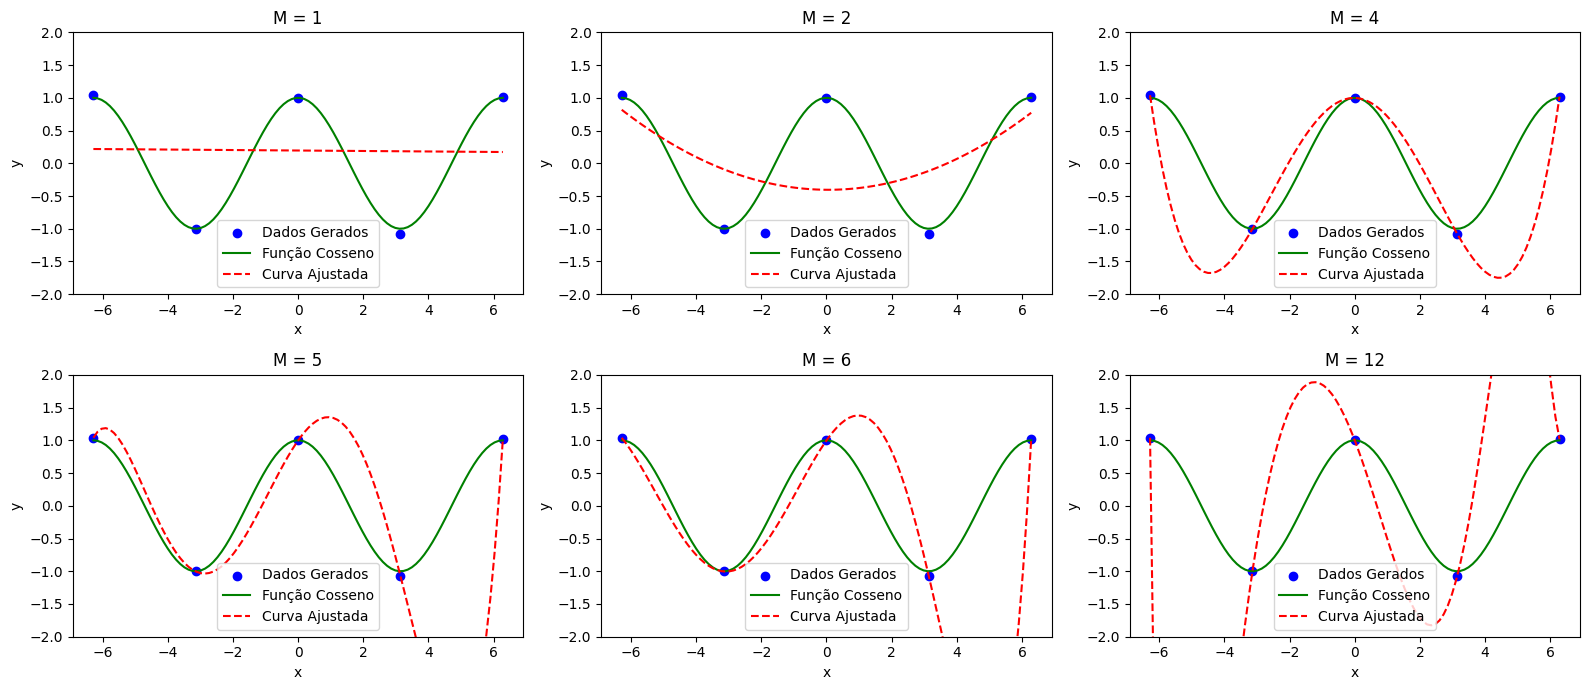

In [ ]:
gerar_graphs(5, -2*np.pi, 2*np.pi, np.cos, np.array([1, 2, 4, 5, 6, 12]), 2, 3, 'Cosseno')

### 10 pontos

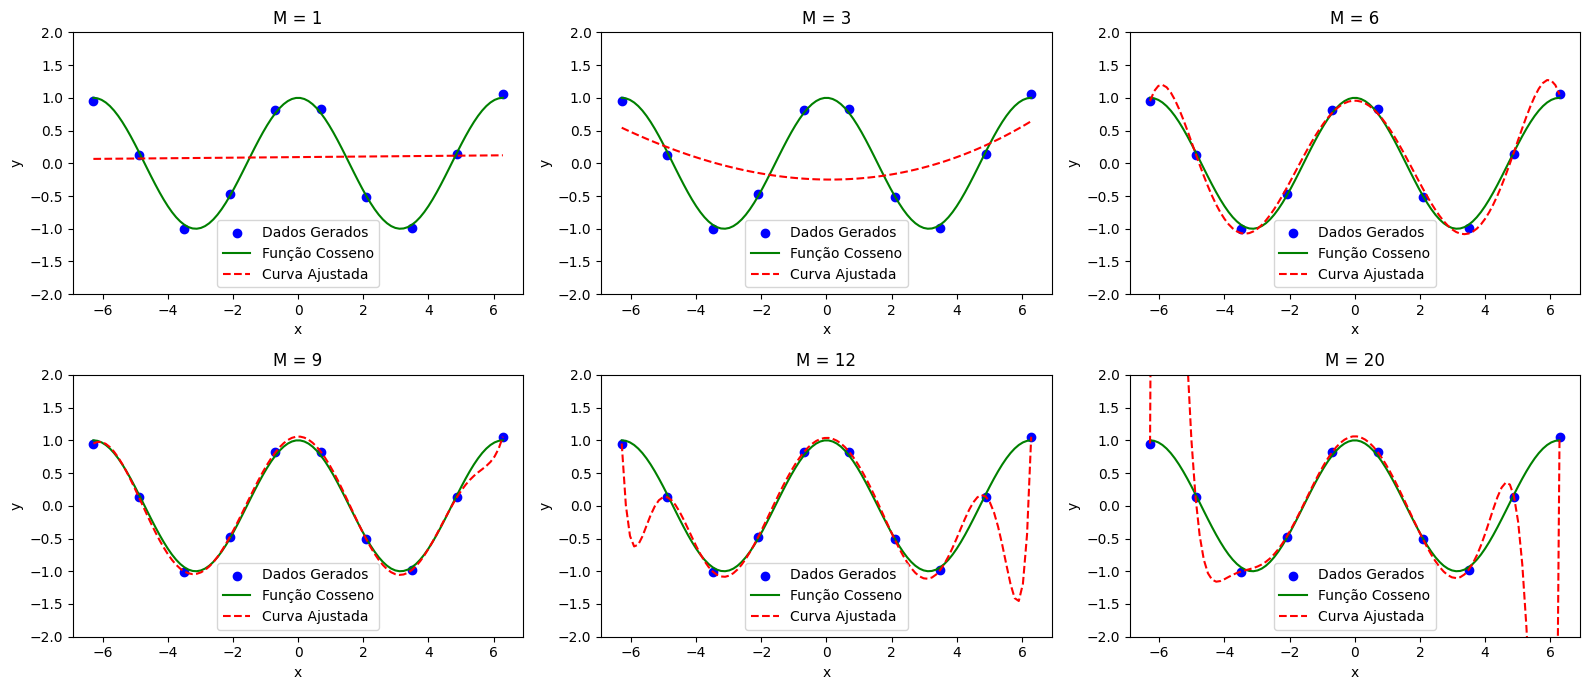

In [ ]:
gerar_graphs(10, -2*np.pi, 2*np.pi, np.cos, np.array([1, 3, 6, 9, 12, 20]), 2, 3, 'Cosseno')

### 20 pontos

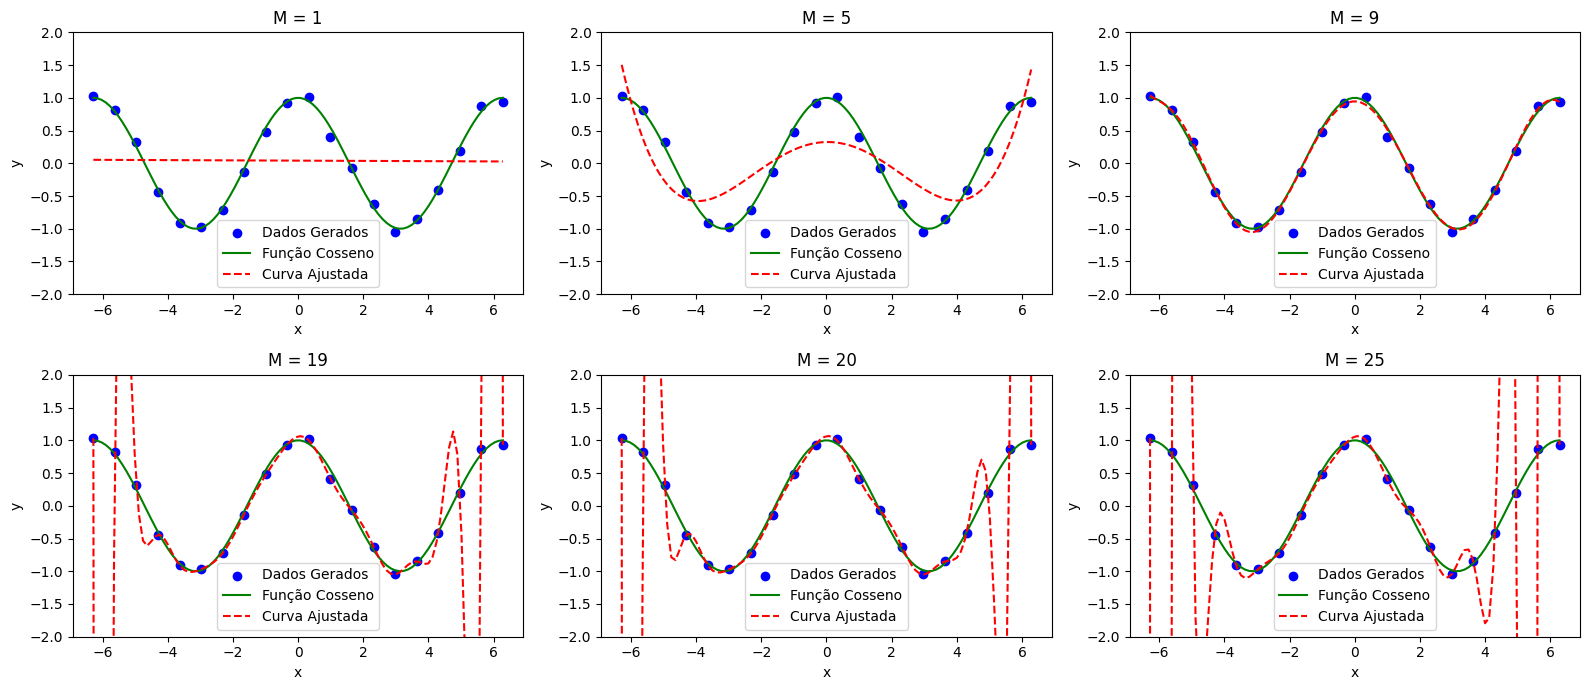

In [ ]:
gerar_graphs(20, -2*np.pi, 2*np.pi, np.cos, np.array([1, 5, 9, 19, 20, 25]), 2, 3, 'Cosseno')

## Exemplo para a função $f(x) = cos(x)^{2} - sin(x)$

### 5 Pontos

In [ ]:
def f_cos_sin(x):
  return np.cos(x)**(2) - np.sin(x)**(1)

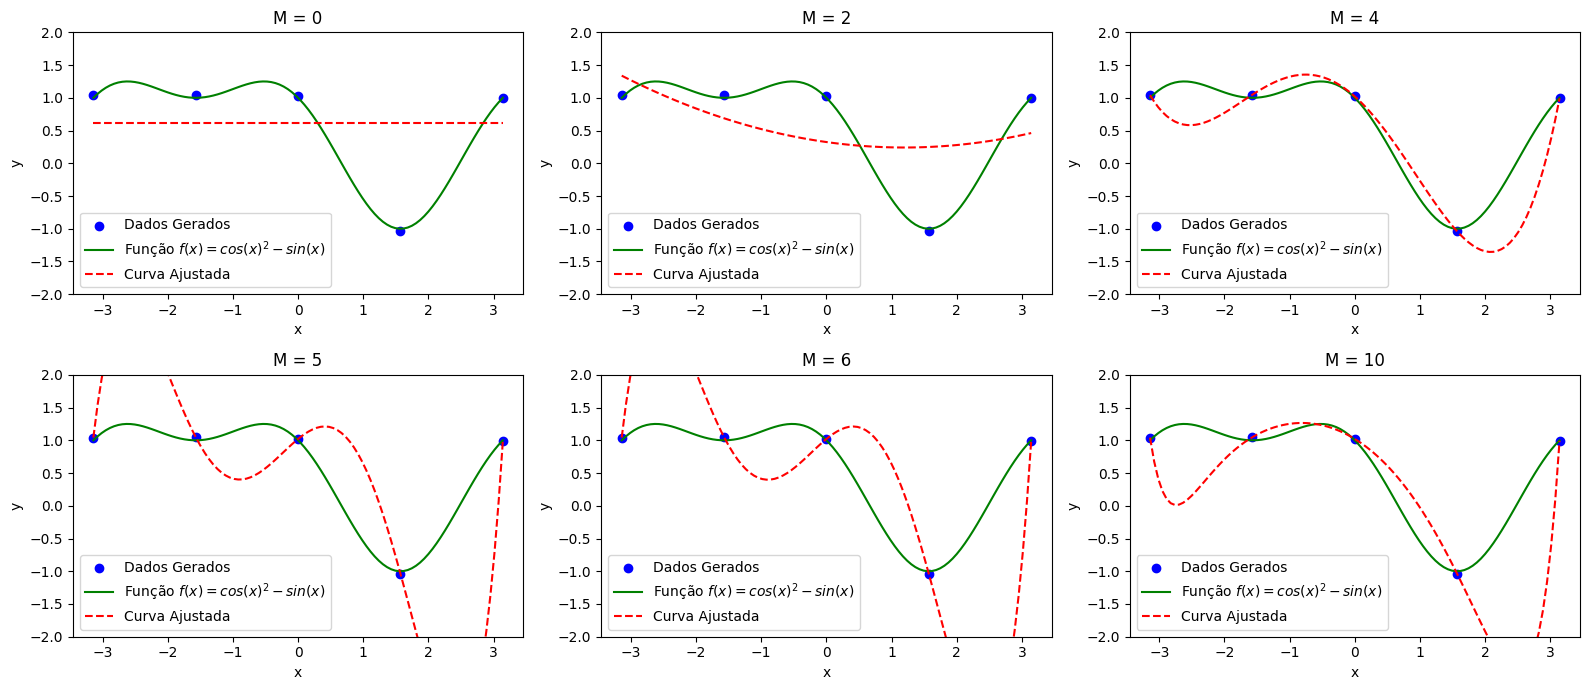

In [ ]:
gerar_graphs(5, -np.pi, np.pi, f_cos_sin, np.array([0, 2, 4, 5, 6, 10]), 2, 3, r'$f(x) = cos(x)^{2} - sin(x)$')

### 10 Pontos

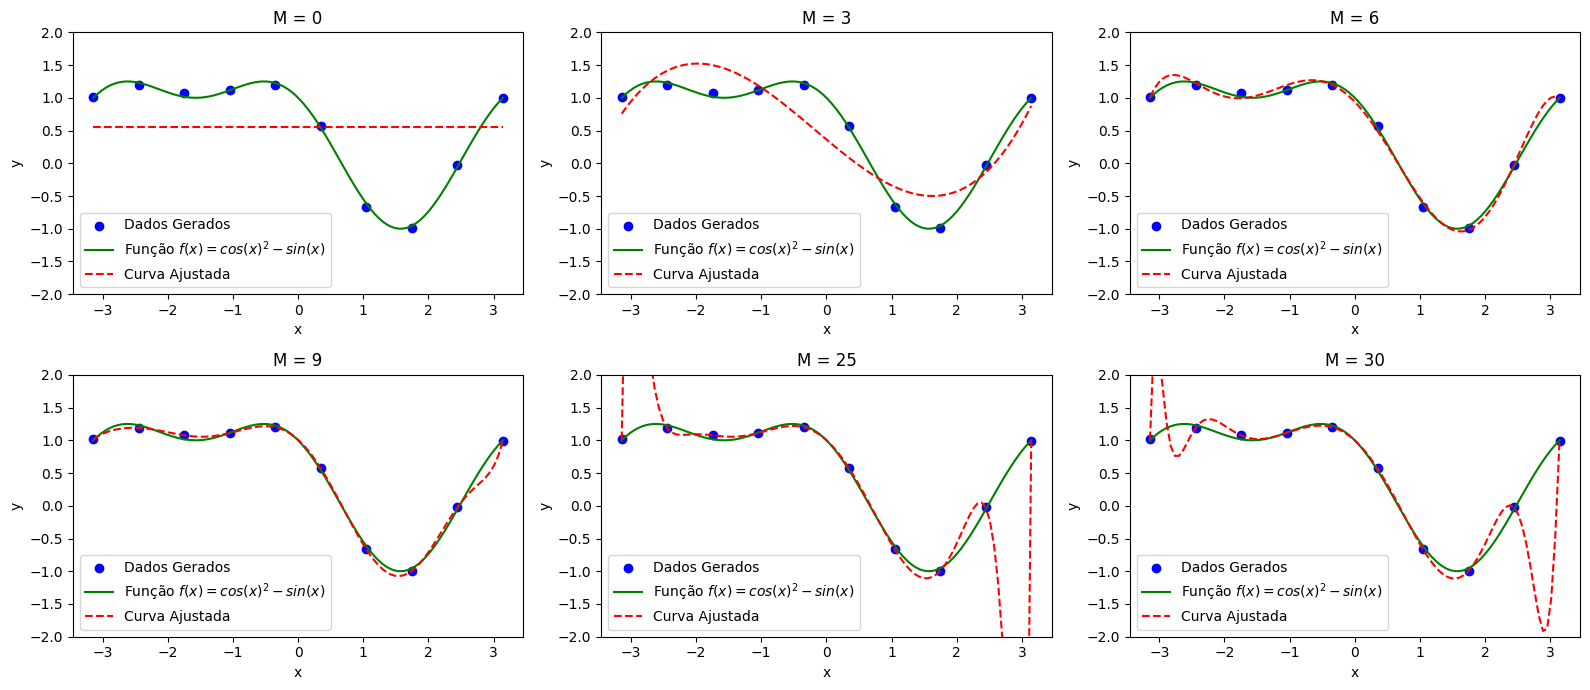

In [ ]:
gerar_graphs(10, -np.pi, np.pi, f_cos_sin, np.array([0, 3, 6, 9, 25, 30]), 2, 3, '$f(x) = cos(x)^{2} - sin(x)$')

### 20 Pontos

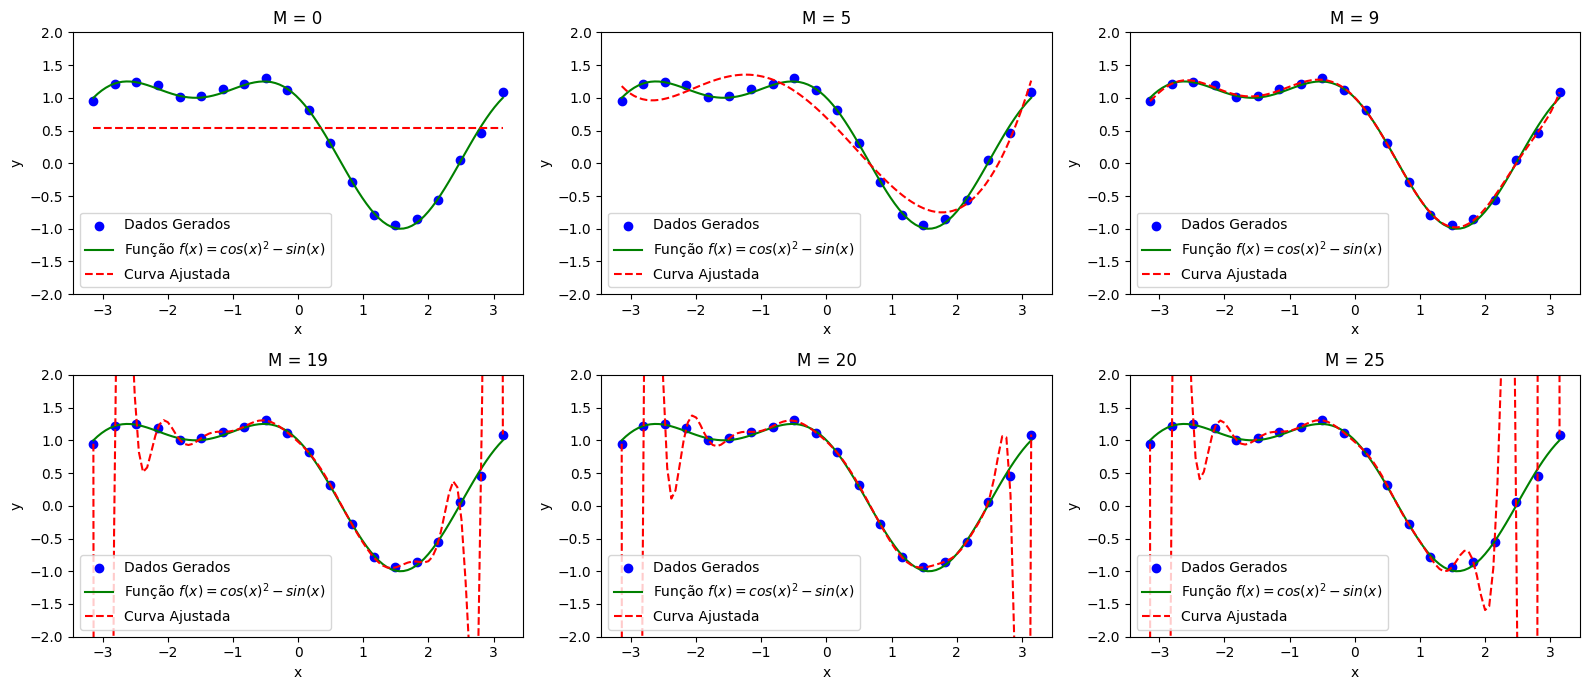

In [ ]:
gerar_graphs(20, -np.pi, np.pi, f_cos_sin, np.array([0, 5, 9, 19, 20, 25]), 2, 3, '$f(x) = cos(x)^{2} - sin(x)$')

## Exemplo para a função $tanh(x)$

### 5 Pontos

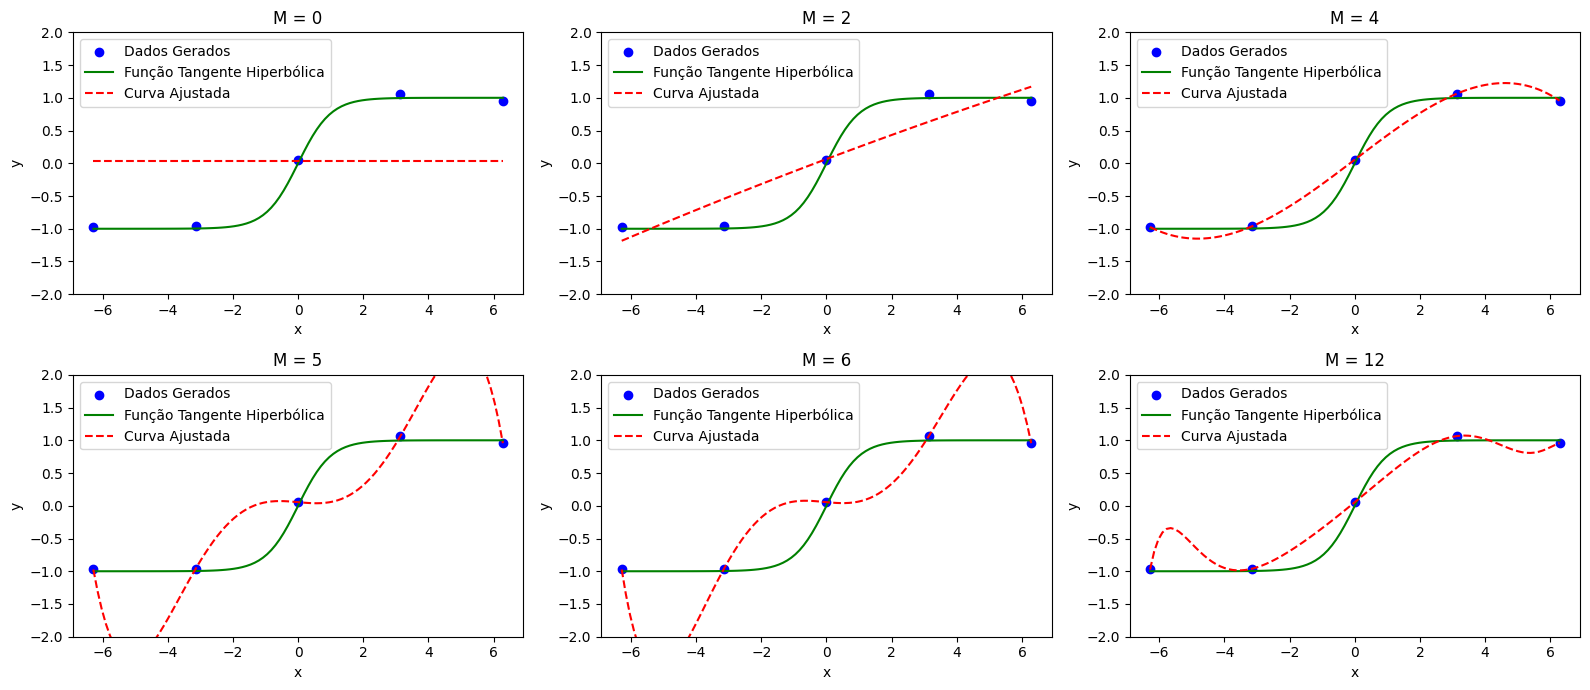

In [ ]:
gerar_graphs(5, -2*np.pi, 2*np.pi, np.tanh, np.array([0, 2, 4, 5, 6, 12]), 2, 3, 'Tangente Hiperbólica')

### 10 Pontos

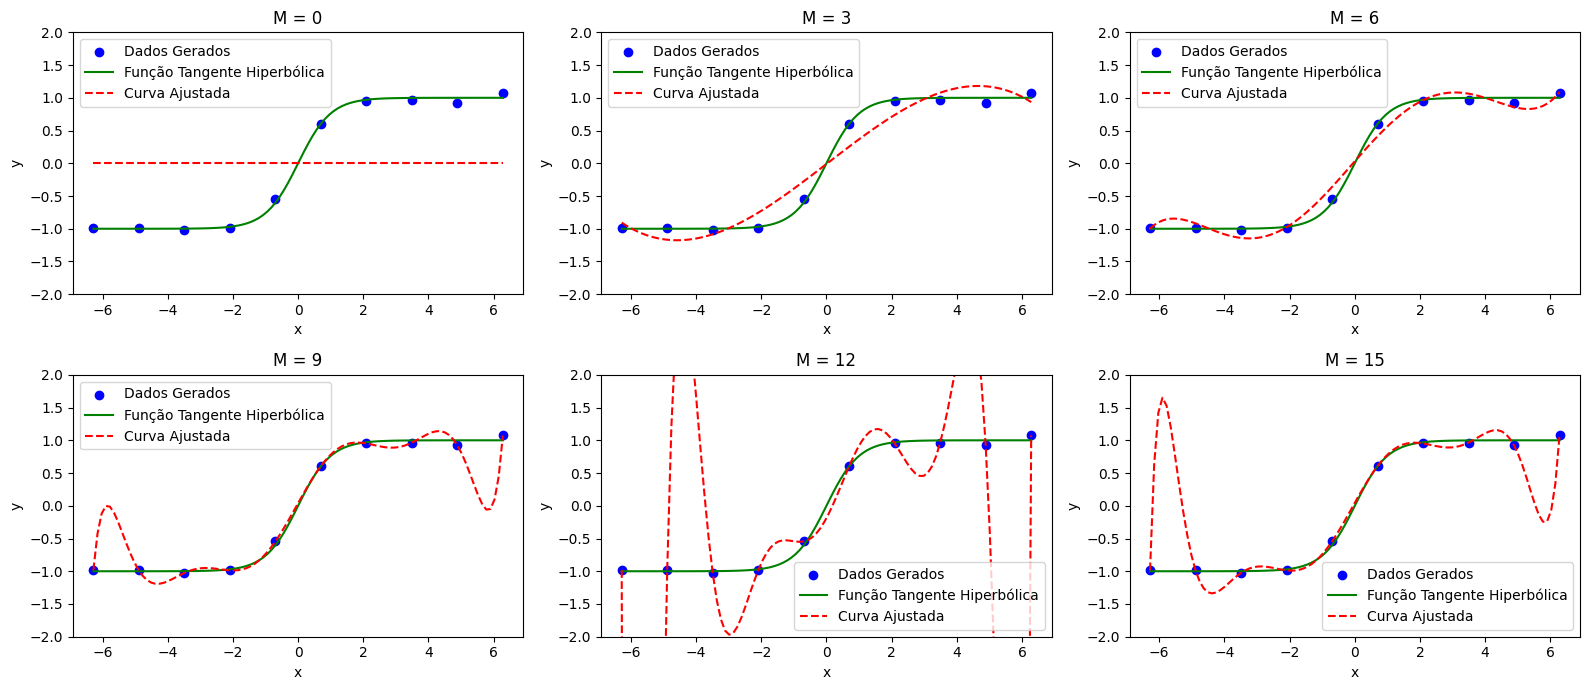

In [ ]:
gerar_graphs(10, -2*np.pi, 2*np.pi, np.tanh, np.array([0, 3, 6, 9, 12, 15]), 2, 3, 'Tangente Hiperbólica')

### 20 Pontos

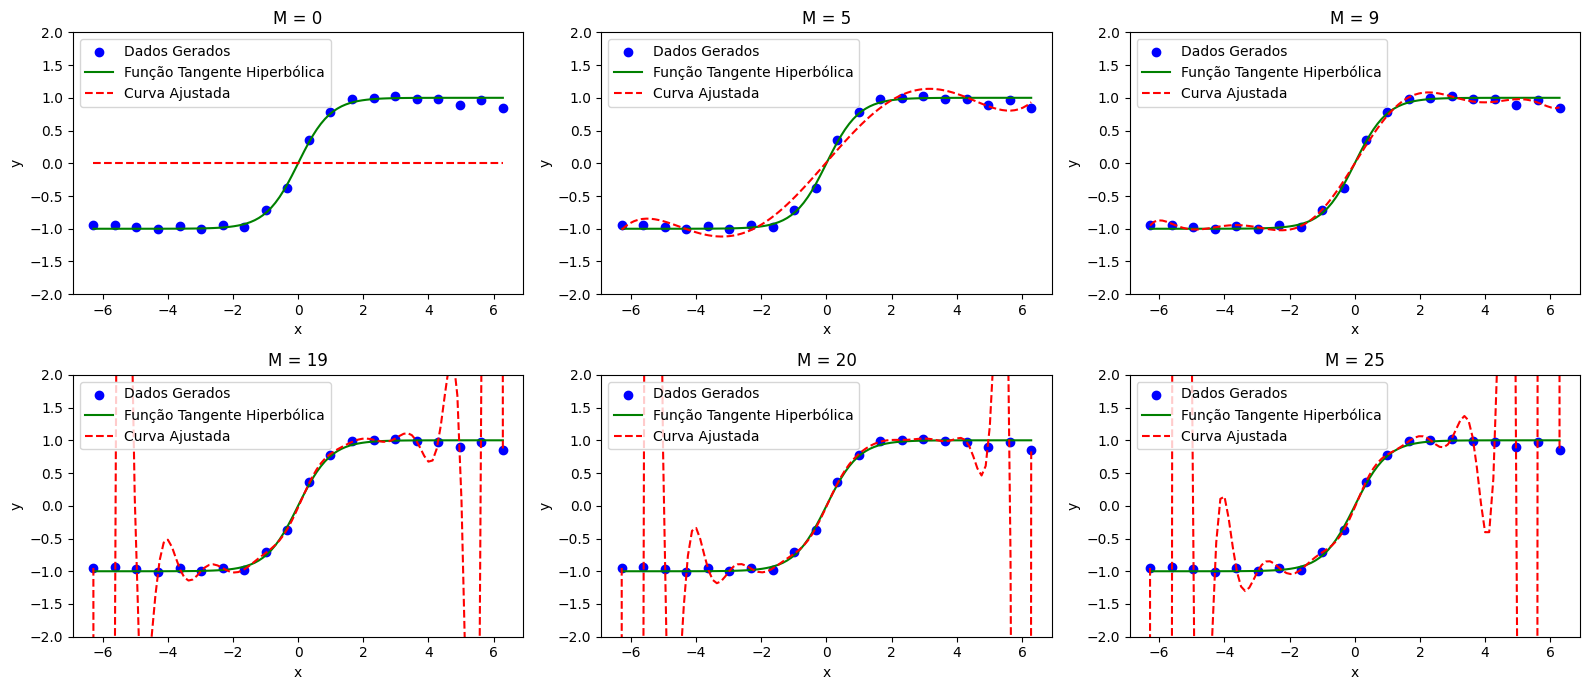

In [ ]:
gerar_graphs(20, -2*np.pi, 2*np.pi, np.tanh, np.array([0, 5, 9, 19, 20, 25]), 2, 3, 'Tangente Hiperbólica')

## Analisando o Erro x Grau do Polinômio

In [ ]:
def err_quad_med(w, x_values, y_values, num_points):

  erro = 0
  for point in range(num_points):
    erro += ( poly(x_values[point], w) - y_values[point] )**(2)

  return (1/2)*erro

def erro_M(grau, x_values, y_values, num_points, f):
  x_poly, y_poly, w = poly_inter(grau, x_values, y_values, num_points)

  return np.sqrt(2* err_quad_med(w, x_values, f(x_values), num_points)/num_points), np.sqrt(2* err_quad_med(w, x_poly, f(x_poly), 100)/100)

In [ ]:
def gerar_graph_error(M_list, num_points, a, b, f):

  x_values, y_values = generate_points(num_points, -2*np.pi, 2*np.pi, f)

  tr_erro = np.ones(len(M_list))
  tt_erro = np.ones(len(M_list))

  for i, grau in enumerate(M_list):
    tr_erro[i], tt_erro[i] = erro_M(grau, x_values, y_values, num_points,f)

  plt.plot(M_list, tr_erro, color = 'blue', label = 'Treino ', marker='o')
  plt.plot(M_list, tt_erro, color = 'red', label = 'Teste ', marker='o')
  plt.legend()
  plt.xlabel('M')
  plt.ylabel(r'$E_{RMS}$')
  plt.tight_layout()
  plt.show()

### função $$cos(x)$$ com 10 pontos

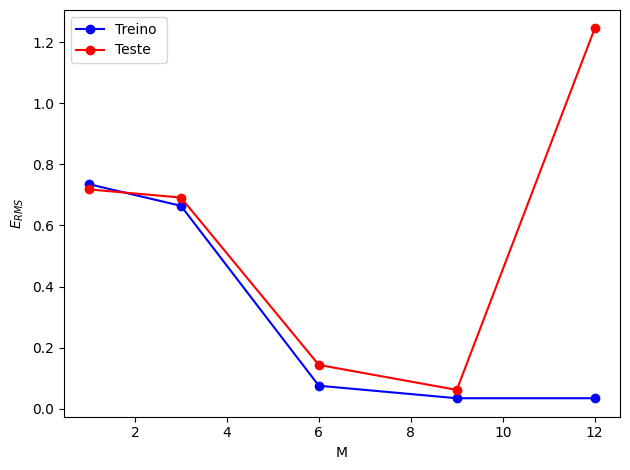

In [ ]:
gerar_graph_error(np.array([1, 3, 6, 9, 12]), 10, -2*np.pi, 2*np.pi, np.cos)

### função $$cos(x)$$ com 10 pontos

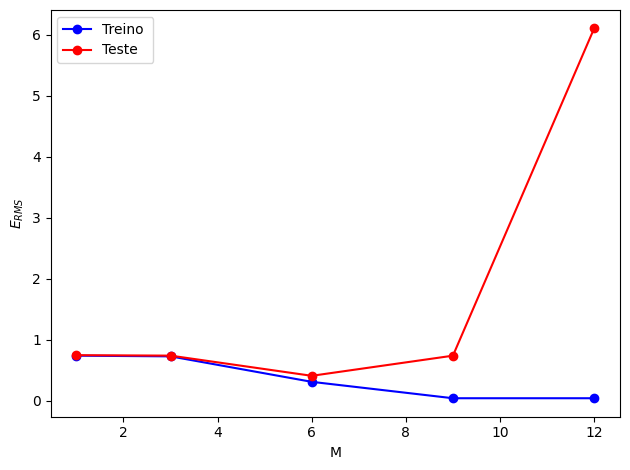

In [ ]:
gerar_graph_error(np.array([1, 3, 6, 9, 12]), 10, -2*np.pi, 2*np.pi, f_cos_sin)

### função $$tanh(x)$$ com 10 pontos

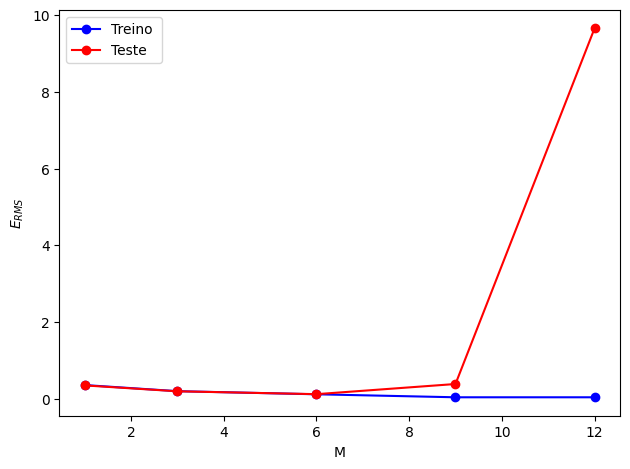

In [ ]:
gerar_graph_error(np.array([1, 3, 6, 9, 12]), 10, -2*np.pi, 2*np.pi, np.tanh)

# 2ª Parte - Regressão Ridge

Temos que minimizar o seguinte termo:

$$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_2^2  $$

Podemos abrir em:<br>

$$    (X \beta - y)^{T} . (X \beta - y) + \lambda \beta^{T} \beta  $$

$$ = $$

$$ (X \beta)^{T} X \beta - (X \beta)^{T} y - y^{T} X \beta + y^{T}y + \lambda \beta^{T} \beta $$

<br>

Temos que $ y^{T} X \beta = (y^{T} X \beta)^{T} = (X \beta)^{T} y  $

<br>

Dessa forma temos: <br>

$$ (X \beta)^{T} X \beta - 2 y^{T} X \beta + y^{T}y + \lambda \beta^{T} \beta  $$

<br>

Para acharmos o $ \beta $ que minimiza a equação acima, precisamos derivar termo a termo e igualar a zero.

$$ \frac{\partial ( (X \beta)^{T} X \beta ))}{\partial \beta} - \frac{\partial (2 y^{T} X \beta) }{\partial \beta} + \frac{\partial(y^{T}y)}{\partial \beta} + \frac{\partial ( \lambda \beta^{T} \beta) }{\partial \beta} = 0 $$

<br>

$$ 2 X^{T} X \beta - 2y^{T}X + 0 + 2 \lambda \beta = 0 $$

<br>

$$  ( X^{T} X  + \lambda \mathbb{I}  ) \beta = y^{T} X $$

In [ ]:
def poly_inter_ridge(grau, x_values, y_values, num_points, lamb):

  X = np.random.random((num_points,grau+1)) # Matriz que iremos construir

  ### Matriz de Vandermonde
  for n_linha in range(num_points):
    linha = np.ones(grau+1)

    for i in range(grau+1): # criando a linha
      linha[i] = x_values[n_linha]**(i)

    X[n_linha] = linha

  I = np.identity(grau+1)
  w_estrela = np.linalg.solve( np.dot(X.T, X) + lamb*I, np.dot(y_values.T, X))

  x_poly = np.linspace(x_values[0], x_values[-1], num = 100)
  y_poly = poly(x_poly, w_estrela)

  return x_poly, y_poly, w_estrela

In [ ]:
def gerar_graphs_ridge(num_points, a, b, f, M_list, lamb_list, linha_subplot, coluna_subplot, str_f):

  x_values, y_values = generate_points(num_points, a, b, f)
  eixo_x = np.linspace(a, b, num = 100)

  plt.figure(figsize=(16,7))
  for i, M in enumerate(M_list):

    x_poly, y_poly, w = poly_inter_ridge(M, x_values, y_values, num_points, lamb_list[i]) # tentado manualmente

    plt.subplot(linha_subplot,coluna_subplot, i+1)
    plt.scatter(x_values, y_values, label='Dados Gerados', color='blue')
    plt.plot(eixo_x, f(eixo_x), color = 'green', label = 'Função ' + str_f)
    plt.plot(x_poly, y_poly, label='Curva Ajustada Ridge', linestyle='--', color='red')
    plt.legend()
    plt.title('M = ' + str(M) + ' e' + '  ' + r'$ln{\lambda}$ = ' + str(np.log(lamb_list[i])) )
    plt.ylim(-2, 2)  # Limites para o eixo y
    plt.xlabel('x')
    plt.ylabel('y')

  plt.tight_layout()
  plt.show()

### Função Cosseno

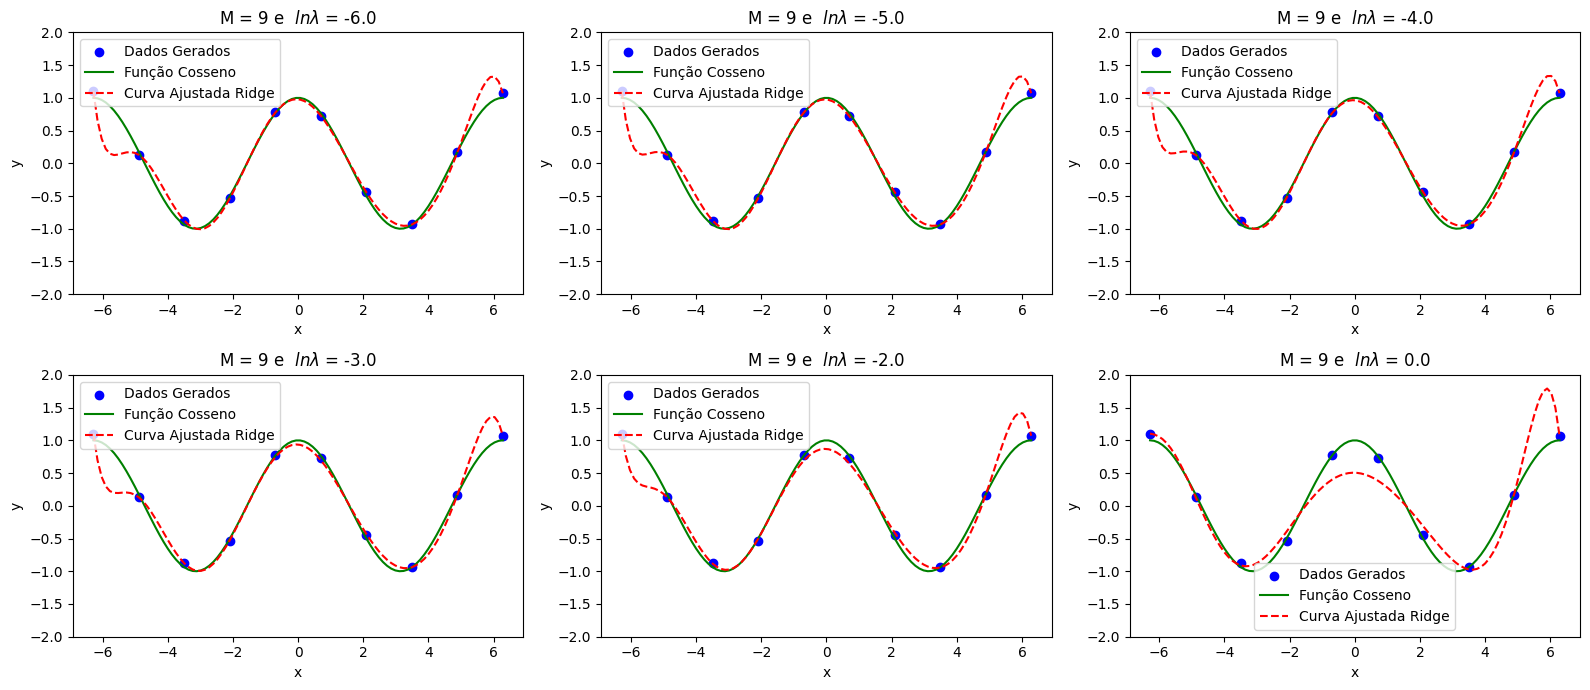

In [ ]:
M_list = np.array([9, 9, 9, 9, 9, 9])
lamb_list = np.exp(np.linspace(-6, 0, num = (len(M_list)), dtype = int, endpoint = True))

gerar_graphs_ridge(10, -2*np.pi, 2*np.pi, np.cos, M_list, lamb_list, 2, 3, 'Cosseno')

## Analisando o erro


In [ ]:
def erro_M_lamb(grau, x_values, y_values, num_points, f, lamb):
  x_poly, y_poly, w = poly_inter_ridge(grau, x_values, y_values, num_points, lamb)

  return np.sqrt(2* err_quad_med(w, x_values, f(x_values), num_points)/num_points), np.sqrt(2* err_quad_med(w, x_poly, f(x_poly), 100)/100)

In [ ]:
def gerar_graph_error_ridge(grau, num_points, a, b, lamb_list, f):

  x_values, y_values = generate_points(num_points, -2*np.pi, 2*np.pi, f)

  tr_erro = np.ones(len(lamb_list))
  tt_erro = np.ones(len(lamb_list))

  for i, lamb in enumerate(lamb_list):
    tr_erro[i], tt_erro[i] = erro_M_lamb(grau, x_values, y_values, num_points, f, lamb)

  plt.plot(np.log(lamb_list), tr_erro, color = 'blue', label = 'Treino ')
  plt.plot(np.log(lamb_list), tt_erro, color = 'red', label = 'Teste ')
  plt.legend()
  plt.xlabel(r'$ln(\lambda)$')
  plt.ylabel(r'$E_{RMS}$')
  plt.tight_layout()
  plt.show()

In [ ]:
lamb_list2 = np.exp(np.linspace(-10, 0, num = 100 , dtype = int, endpoint = True))

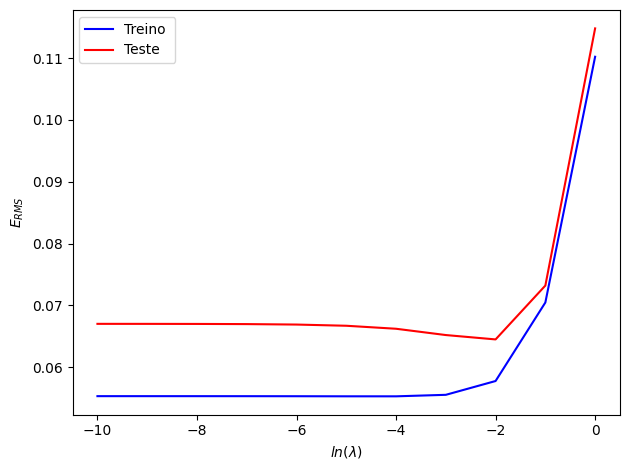

In [ ]:
gerar_graph_error_ridge(9, 15, -2*np.pi, 2*np.pi, lamb_list2, np.tanh)